# PRÁCTICA KC_HOUSE NOELIA CÁRDENAS

Las empresas inmobiliarias online ofrecen valoraciones de casas utilizando técnicas de aprendizaje automático. 
Mi objetivo es predecir las ventas de viviendas en el condado de King, estado de Washington, EE. UU. utilizando la regresión lineal múltiple. 
El conjunto "kc_house" consta de datos históricos de casas vendidas entre mayo de 2014 y mayo de 2015. El conjunto de datos consiste en los precios de la vivienda del condado de King como ya he mencionado y estos datos también cubren Seattle.

Antes de comenzar voy a explicar las variables del conjunto:


**ID**: variable identificativa de cada casa


**Date**: fecha de compra


**Price**: precio


**Bedrooms**: número de habitaciones


**Bathrooms**: número de baños


**Sqft_living**: área completa medida en pies cuadrados


**Sqft_lot**: área interior medida en pies cuadrados


**Floors**: número de plantas


**Waterfront**: si tiene acceso a un lago o no


**View**: vistas 


**Condition**: calidad de la construcción


**Grade**: medido del 1 al 13


**Sqft_above**: término que se refiere a todos los pies cuadrados que hay por encima del suelo


**Sqft_basement**: lo mismo pero bajo tierra


**yr_built**: año de construcción


**yr_renovated**: año en el que se han hecho renovaciones


**Zipcode**: código postal


**Lat y Long**: latitud y longitud


**Sqft_living15**: Los metros cuadrados de espacio habitable de vivienda para los 15 vecinos más cercanos.


**Sqft_lot15**: superficie de la parcela promedio de los 15 vecinos más cercanos.

# 1. Análisis descriptivo de los datos

Comienzo importando los datos en un DataFrame utilizando la biblioteca Pandas:

In [1]:
import numpy  as np  
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

data= pd.read_csv('kc_house.txt', sep=',')
data = data.rename(columns={"d":"id"})
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [2]:
data.shape

(21613, 21)

El dataset consta de 21 variables y 21613 observaciones.

Las columnas id y date no nos aportan información últil para nuestro objetivo, las elimino. Además paso a metros cuadrados las variables que se encuentran en pies al cuadrado.

In [3]:
data = data.drop(columns = ['id','date'])
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
data[feetFeatures] = data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

#renombro las variables
data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

## 1.1 Valores nulos y duplicados

In [4]:
print("Valores nulos:")
print(data.isnull().sum())

Valores nulos:
price           0
bedrooms        0
bathrooms       0
sqm_living      0
sqm_lot         0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqm_above       0
sqm_basement    0
yr_built        0
yr_renovated    0
zip_code        0
lat             0
long            0
sqm_living15    0
sqm_lot15       0
dtype: int64


No hay valores missing.

In [5]:
print('Número de valores duplicados:', data.shape[0] - data.drop_duplicates().shape[0])
data = data.drop_duplicates()

Número de valores duplicados: 5


## 1.2 Tipo de variables:

In [6]:
pd.value_counts(data.dtypes)

float64    11
int64       8
dtype: int64

In [7]:
!pip install pandas-summary
import pandas_summary as ps

In [8]:
dfs = ps.DataFrameSummary(data)
print('categoricals: ', dfs.categoricals.tolist())
print('numerics: ', dfs.numerics.tolist())

categoricals:  []
numerics:  ['price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors', 'view', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built', 'yr_renovated', 'zip_code', 'lat', 'long', 'sqm_living15', 'sqm_lot15']


## 1.3 Variable objetivo: Price

In [9]:
data['price'].describe().round(2)

count      21608.00
mean      540098.37
std       367164.57
min        75000.00
25%       321837.50
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

/Users/noelia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


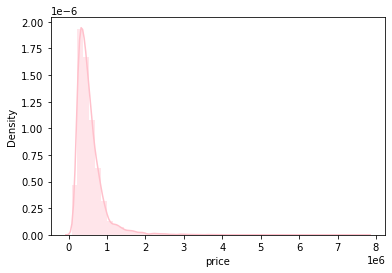

In [10]:
import seaborn as sns
sns.distplot(data['price'], color='pink');

In [11]:
import plotly.graph_objects as go

from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1,
                    subplot_titles=("Valores",))


temp_data=data.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='pink')),
    row=1, col=1
)

fig.update_layout(height=400)
fig.show()

## 1.4 Matriz de correlaciones

In [12]:
continuas = []

for column in data.columns:
   
    if pd.api.types.is_numeric_dtype(data[column]):
       
        if pd.api.types.is_float_dtype(data[column]) or pd.api.types.is_integer_dtype(data[column]):
           
            continuas.append(column)


print("Las variables continuas en el dataset son:", continuas)

Las variables continuas en el dataset son: ['price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built', 'yr_renovated', 'zip_code', 'lat', 'long', 'sqm_living15', 'sqm_lot15']


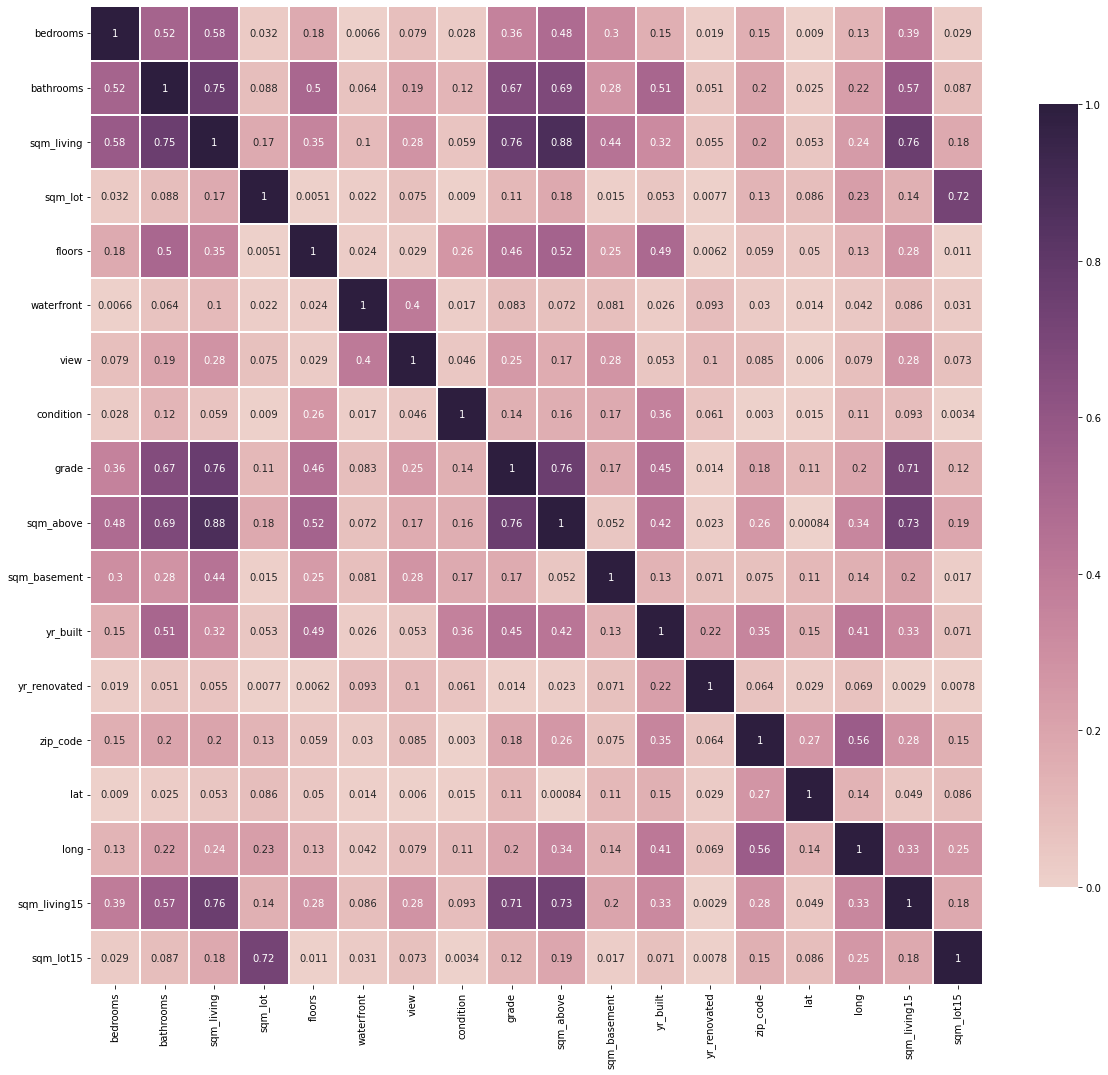

In [13]:
corr = np.abs(data.drop(['price'], axis=1).corr())

f, ax = plt.subplots(figsize=(20, 18))

sns.heatmap(corr,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap=sns.cubehelix_palette(as_cmap=True),annot=True, cbar_kws={"shrink": .8})
plt.show()

# Outliers

Para entender mejor los datos, voy a representar algunas de las variables en histogramas.

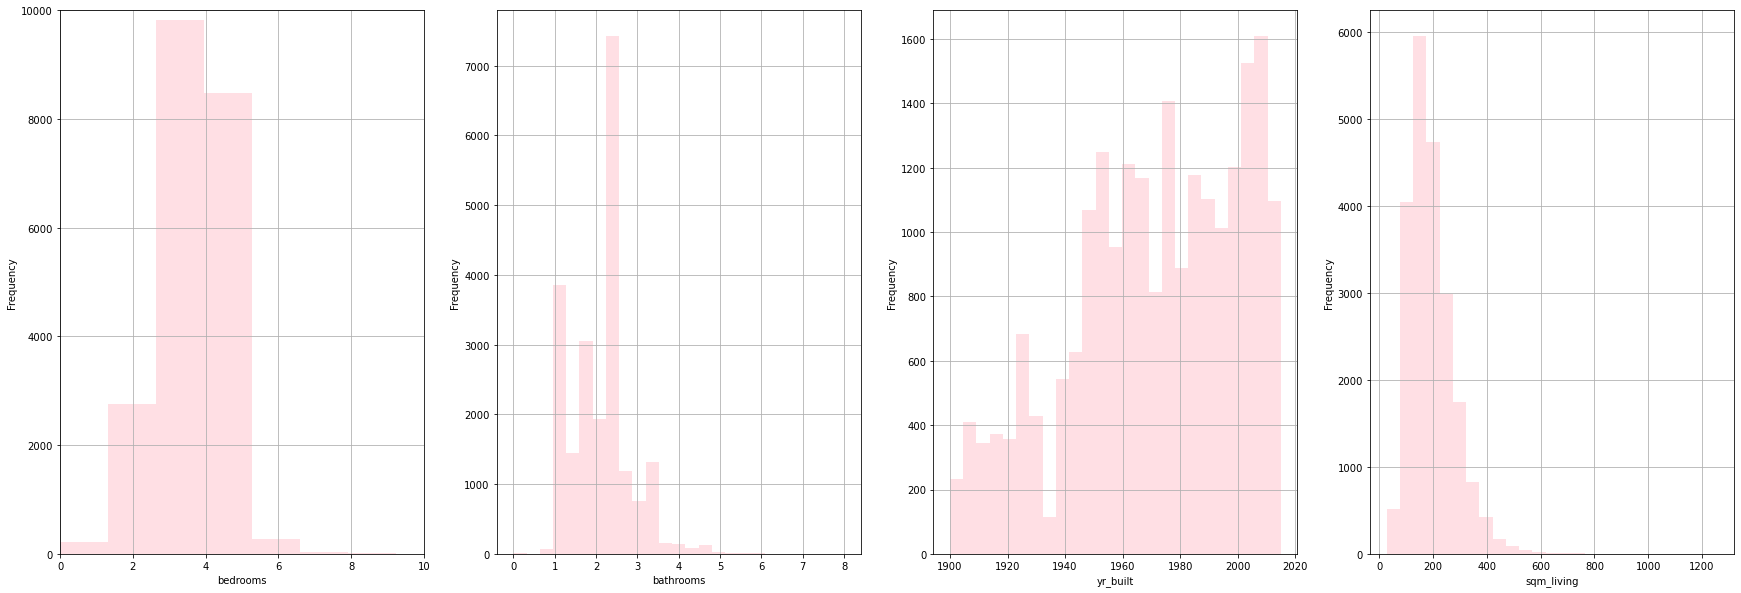

In [14]:
plt.figure(figsize=(30, 10))

plt.subplot(1,4,1)
data['bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True, color=['pink'])
plt.axis([0, 10, 0, 10000])
plt.xlabel('bedrooms')

plt.subplot(1,4,2)
data['bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True, color=['pink'])
plt.xlabel('bathrooms')

plt.subplot(1,4,3)
data['yr_built'].plot.hist(alpha=0.5, bins=25, grid = True, color=['pink'])
plt.xlabel('yr_built')

plt.subplot(1,4,4)
data['sqm_living'].plot.hist(alpha=0.5, bins=25, grid = True, color=['pink'])
plt.xlabel('sqm_living')

plt.show()

El siguiente paso del análisis exploratorio es entender las relaciones entre cada una de las variables y la variable respuesta.

Para ello utilizo un scatter plot con la variable objetivo definida "price" como variable dependiente, y alguna una de las variables explicativas como variables independientes. En el caso de waterfront, como es binaria, utilizo un boxplot.

<Figure size 720x720 with 0 Axes>

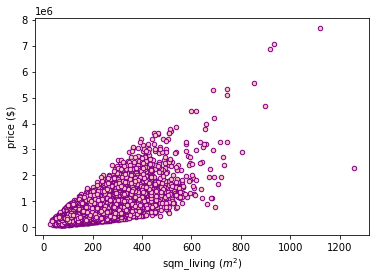

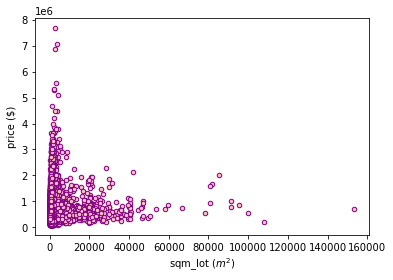

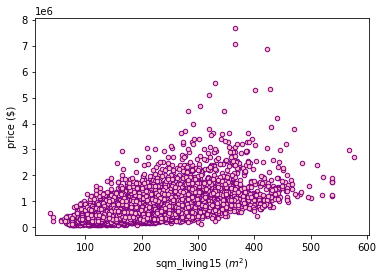

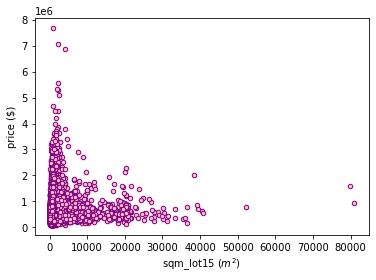

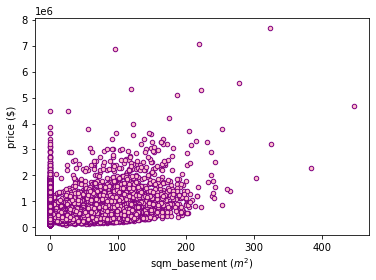

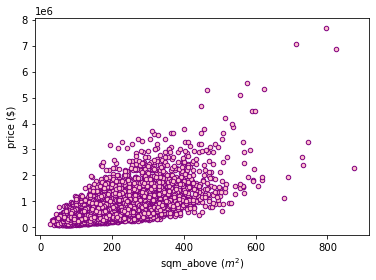

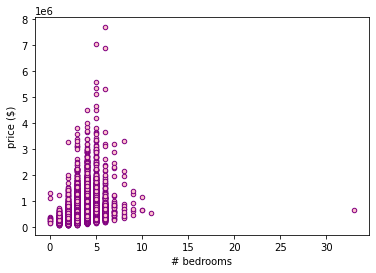

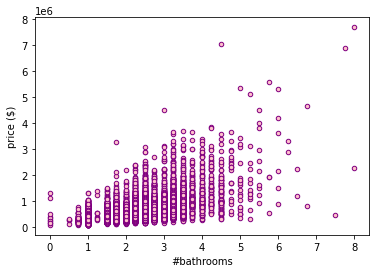

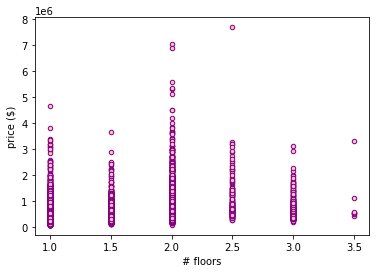

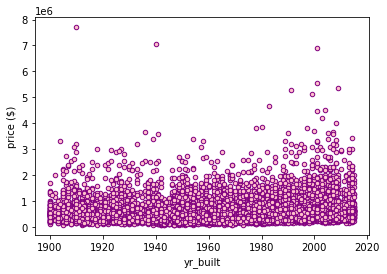

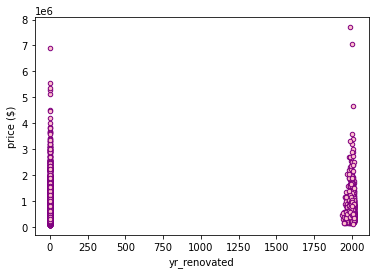

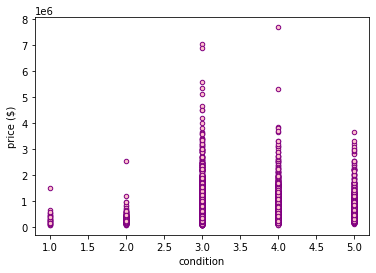

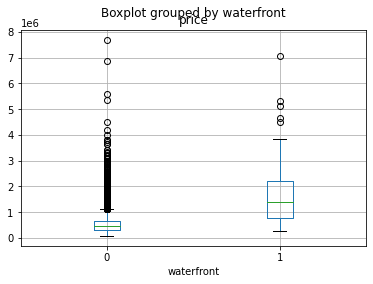

In [15]:
plt.figure(figsize=(10, 10))

data.plot(kind = 'scatter', x='sqm_living',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')  
plt.show()

data.plot(kind = 'scatter',x='sqm_lot',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_lot ($m^2$)')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='sqm_living15',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_living15 ($m^2$)')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='sqm_lot15',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_lot15 ($m^2$)')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='sqm_basement',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_basement ($m^2$)')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='sqm_above',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_above ($m^2$)')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='bedrooms',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='bathrooms',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('#bathrooms')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='floors',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('# floors')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='yr_built',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('yr_built')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='yr_renovated',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('yr_renovated')
plt.ylabel('price ($)')
plt.show()

data.plot(kind = 'scatter',x='condition',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('condition')
plt.ylabel('price ($)')
plt.show()

data.boxplot(by='waterfront',column = 'price')
plt.show()


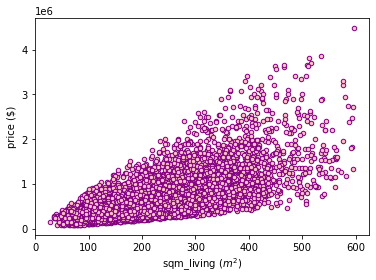

El filtro elimina un total de 45 registros, el 0.20825620140688633%


In [16]:
filter_sqm_living = data['sqm_living'] <= 600
data_filtered = data[filter_sqm_living]

data_filtered.plot(kind = 'scatter',x='sqm_living',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

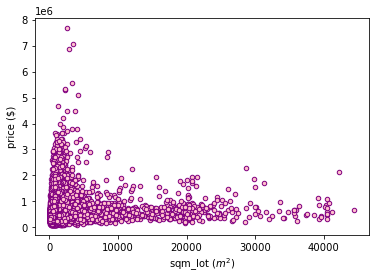

El filtro elimina un total de 23 registros, el 0.10644205849685301%


In [17]:
filter_sqm_lot = data['sqm_lot'] <= 45000
data_filtered = data[filter_sqm_lot]

data_filtered.plot(kind = 'scatter',x='sqm_lot',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_lot ($m^2$)')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

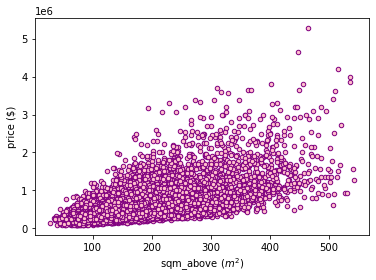

El filtro elimina un total de 32 registros, el 0.1480932987782303%


In [18]:
filter_sqm_above = data['sqm_above'] <= 550
data_filtered = data[filter_sqm_above]

data_filtered.plot(kind = 'scatter',x='sqm_above',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_above ($m^2$)')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

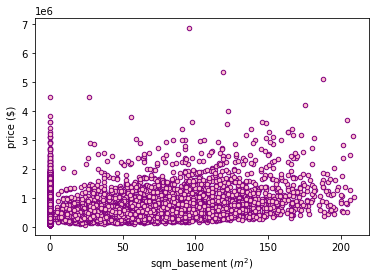

El filtro elimina un total de 28 registros, el 0.1295816364309515%


In [19]:
filter_sqm_basement = data['sqm_basement'] <= 210
data_filtered = data[filter_sqm_basement]

data_filtered.plot(kind = 'scatter',x='sqm_basement',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_basement ($m^2$)')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

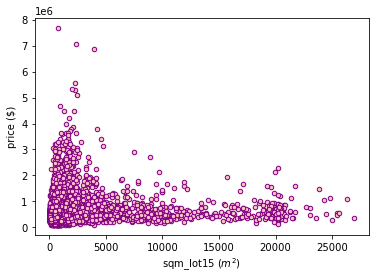

El filtro elimina un total de 27 registros, el 0.1249537208441318%


In [20]:
filter_sqm_lot15 = data['sqm_lot15'] <= 27000
data_filtered = data[filter_sqm_lot15]

data_filtered.plot(kind = 'scatter',x='sqm_lot15',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_lot15 ($m^2$)')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

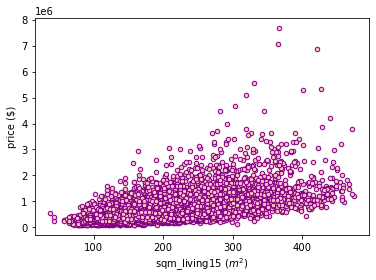

El filtro elimina un total de 17 registros, el 0.07867456497593484%


In [21]:
filter_sqm_living15 = data['sqm_living15'] <= 480
data_filtered = data[filter_sqm_living15]

data_filtered.plot(kind = 'scatter',x='sqm_living15',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('sqm_living15 ($m^2$)')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

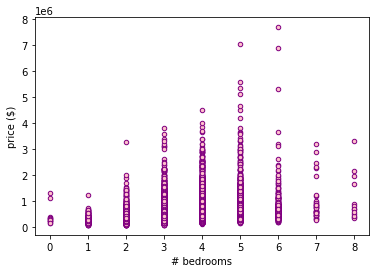

El filtro elimina un total de 11 registros, el 0.050907071455016654%


In [22]:
filter_bedrooms = data['bedrooms'] <= 8
data_filtered = data[filter_bedrooms]

data_filtered.plot(kind = 'scatter',x='bedrooms',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

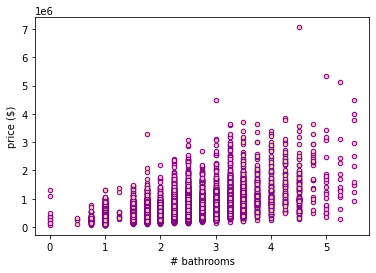

El filtro elimina un total de 20 registros, el 0.09255831173639394%


In [23]:
filter_bathrooms = data['bathrooms'] <= 5.5
data_filtered = data[filter_bathrooms]

data_filtered.plot(kind = 'scatter',x='bathrooms',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('# bathrooms')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

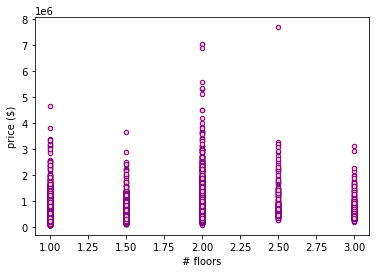

El filtro elimina un total de 8 registros, el 0.037023324694557574%


In [24]:
filter_floors = data['floors'] <= 3
data_filtered = data[filter_floors]

data_filtered.plot(kind = 'scatter',x='floors',y = 'price', color= ['pink'], edgecolor='purple')
plt.xlabel('# floors')
plt.ylabel('price ($)')
plt.show()

print(f'El filtro elimina un total de {data.shape[0]-data_filtered.shape[0]} registros, '
      f'el {((data.shape[0]-data_filtered.shape[0])/data.shape[0])*100}%')

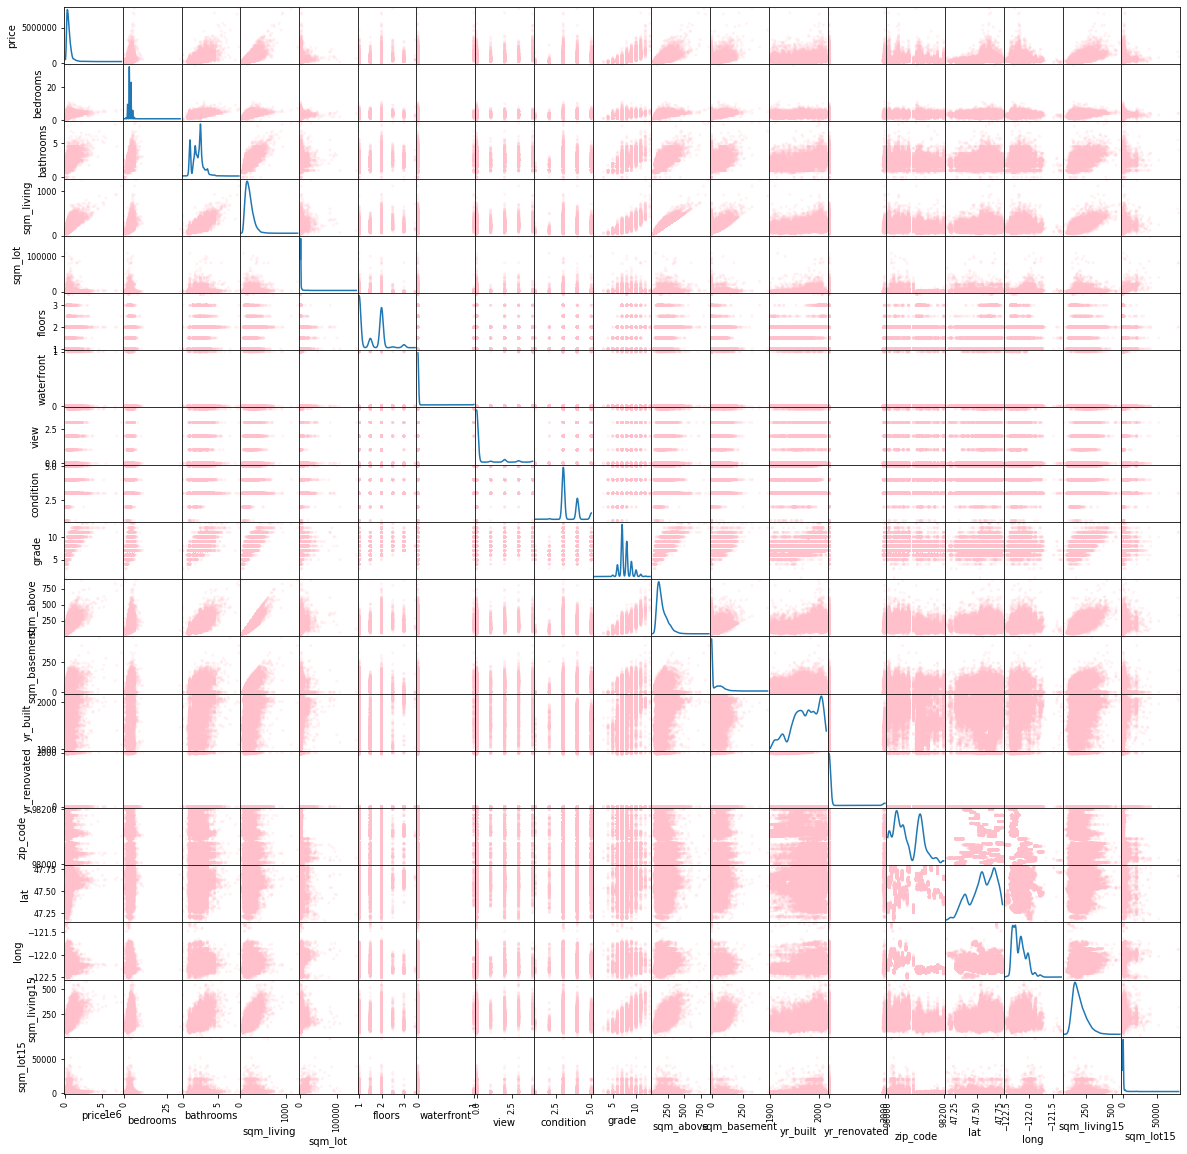

In [25]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal = 'kde', color= ['pink'])
plt.show()

Ahora ya puedo decidir qué variables tienen una correlación muy alta, observo que sqm_living y sqm_above superan el coeficiente de correlación 0,9 por lo que eliminaré sqm_above.

Además voy a crear una nueva variable llamada antiquity que va a sustituir a yr_built, ya que aporta más información saber cuántos años lleva construida la casa que en qué año se construyo. Como nuestros datos están comprendidos en el año límite 2017, voy a restar 2017-yr_built.

In [26]:
data= data.drop(columns="sqm_above")
data['antiquity']= 2017 - data['yr_built']

# 3. Método de filtrado

Respondiendo a la pregunta: ¿Cómo medirías que importancia tiene cada variable a la hora de clasificar correctamente la variable objetivo? Haciendo uso de alguno de los métodos propuestos, muestra una gráfica que presente de forma ordenada la importancia que tiene cada variable.

Utlizaré el F test.

Voy a añadir nuevas variables que me van a ser útiles:

In [27]:
data['bedrooms_squared'] = data['bedrooms'].apply(lambda x: x**2) 
data['bed_bath_rooms']   = data['bedrooms']*data['bathrooms']
data['log_sqm_living']   = data['sqm_living'].apply(lambda x: np.log(x))
data['lat_plus_long']    = data['lat']*data['long']

Cambio el formato del dataFrame para poder usar scikit-learn.

In [28]:
data_modelo = data.values 

/Users/noelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/noelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



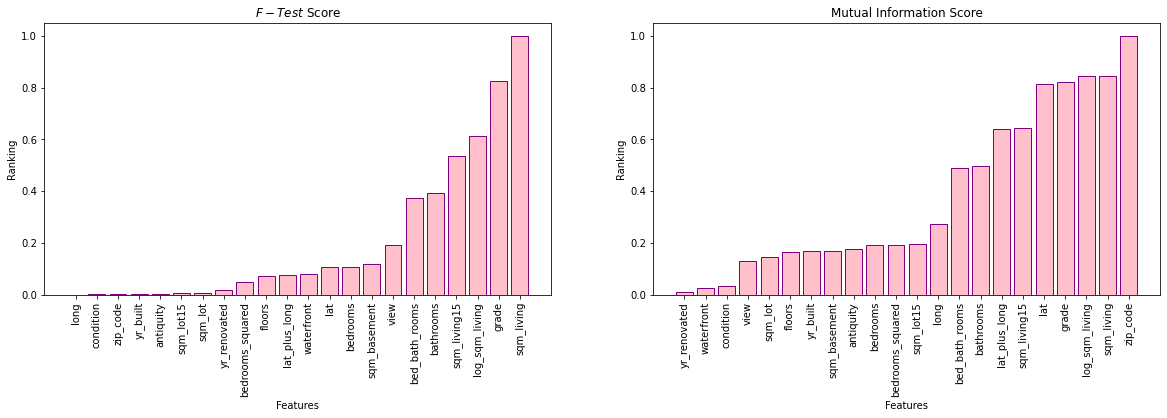

In [29]:
from sklearn.feature_selection import f_regression, mutual_info_regression

y = data_modelo[:,0:1]     
X = data_modelo[:,1:]      

feature_names = data.columns[1:]


f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

idx_f_test = np.argsort(f_test)
idx_mi = np.argsort(mi)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test[idx_f_test],  align="center", color= ['pink'], edgecolor='purple')
plt.xticks(range(X.shape[1]),feature_names[idx_f_test], rotation = 90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('$F-Test$ Score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi[idx_mi], align="center", color= ['pink'], edgecolor='purple')
plt.xticks(range(X.shape[1]),feature_names[idx_mi], rotation = 90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Mutual Information Score')

plt.show()



plt.show()

Finalmente observo que las variables más importantes son: los metros cuadrados (sqm_living) y la calidad de los materiales.

La Mutual Information Score (MI) es un valor no negativo que mide la dependencia mutua entre dos variables aleatorias( precio y otra variable), es decir, mide la cantidad de información que podemos conocer de una variable al observar los valores de la segunda variable. En nuestro caso destaca el código postal (zipcode).


# 4. Modelo de Regresión Lineal

Anteriormente he observado que mi variable objetivo no cumple la hipótesis de normalidad (lo muestro de nuevo a continuación), por ello le aplico una transformación logarítmica para construir mi modelo.

/Users/noelia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



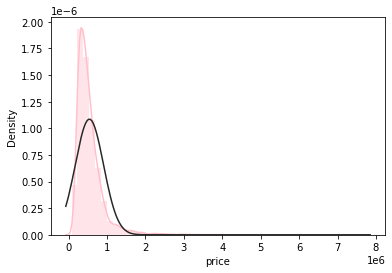

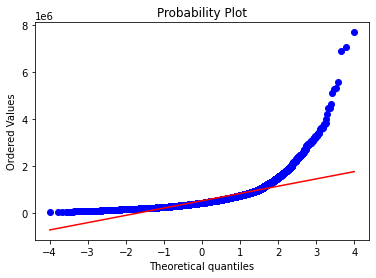

In [30]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats
sns.distplot(data['price'], fit=norm, color='pink');
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
data['price'] = np.log(data['price'])

In [55]:
import statsmodels.api as sm
X = data.iloc[:, 1:]
y = data['price']

X = sm.add_constant(X)
X.iloc[:5, :5]

const  bedrooms  bathrooms  sqm_living     sqm_lot
0    1.0         3       1.00  109.625587  524.902176
1    1.0         3       2.25  238.760813  672.803816
2    1.0         2       1.00   71.535341  929.030400
3    1.0         4       3.00  182.089958  464.515200
4    1.0         3       2.00  156.077107  750.656563

Ahora la variable objetivo ya está normalizada.

/Users/noelia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

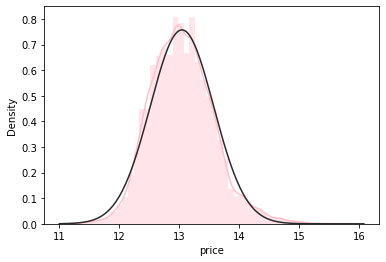

In [54]:
sns.distplot(data['price'], fit=norm, color='pink')

In [32]:
alpha = 0.05

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     3626.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:02:17   Log-Likelihood:                -490.71
No. Observations:               21608   AIC:                             1025.
Df Residuals:                   21586   BIC:                             1201.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0066      0.000     23.876      0.000       0.006       0.007
bedrooms            -0.0456      0.006     -7.244      0.000      -0.058      -0.033
bathrooms            0.0471      0.009      4.964      0.000       0.028       0.066
sqm_living           0.0005    8.8e-05      6.070      0.000       0.000       0.001
sqm_lot           4.888e-06   6.35e-07      7.697      0.000    3.64e-06    6.13e-06
floors               0.0569      0.004     12.677      0.000       0.048       0.066
waterfront           0.4133      0.021     19.284      0.000       0.371       0.455
view                 0.0599      0.003     22.673      0.000       0.055       0.065
condition            0.0555      0.003     19.077      0.000       0.050       0.061
grade                0.1544      0.003     57.786      0.000       0.149       0.160
sqm_basement     -5.121e-05   5.85e-05     -0.876      0.381      -0.000    6.34e-05
yr_built             6.6488      0.279     23.869      0.000       6.103       7.195
yr_renovated      3.276e-05   4.51e-06      7.271      0.000    2.39e-05    4.16e-05
zip_code            -0.0008   4.14e-05    -20.077      0.000      -0.001      -0.001
lat               -280.7103     11.805    -23.778      0.000    -303.850    -257.571
long               109.5400      4.591     23.860      0.000     100.541     118.539
sqm_living15         0.0011   4.59e-05     23.127      0.000       0.001       0.001
sqm_lot15         -2.31e-06   9.71e-07     -2.380      0.017   -4.21e-06   -4.08e-07
antiquity            6.6521      0.279     23.882      0.000       6.106       7.198
bedrooms_squared     0.0013      0.000      4.574      0.000       0.001       0.002
bed_bath_rooms       0.0041      0.002      1.803      0.071      -0.000       0.009
log_sqm_living       0.2600      0.017     14.966      0.000       0.226       0.294
lat_plus_long       -2.3086      0.097    -23.897      0.000      -2.498      -2.119
==============================================================================
Omnibus:                      298.327   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              560.402
Skew:                           0.010   Prob(JB):                    2.04e-122
Kurtosis:                       3.789   Cond. No.                     3.61e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Aplicando el algoritmo Step-Wise elimino la variable bed_bath_rooms por superar su p-valor 0.05.

In [33]:
X = X.drop('bed_bath_rooms', axis=1)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     3807.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:02:17   Log-Likelihood:                -492.33
No. Observations:               21608   AIC:                             1027.
Df Residuals:                   21587   BIC:                             1194.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0066      0.000     23.909      0.000       0.006       0.007
bedrooms            -0.0365      0.004     -9.664      0.000      -0.044      -0.029
bathrooms            0.0625      0.004     15.557      0.000       0.055       0.070
sqm_living           0.0006   7.41e-05      8.372      0.000       0.000       0.001
sqm_lot           4.867e-06   6.35e-07      7.663      0.000    3.62e-06    6.11e-06
floors               0.0563      0.004     12.576      0.000       0.048       0.065
waterfront           0.4122      0.021     19.240      0.000       0.370       0.454
view                 0.0599      0.003     22.673      0.000       0.055       0.065
condition            0.0552      0.003     19.006      0.000       0.050       0.061
grade                0.1539      0.003     57.900      0.000       0.149       0.159
sqm_basement      -5.58e-05   5.84e-05     -0.955      0.339      -0.000    5.87e-05
yr_built             6.6575      0.279     23.903      0.000       6.112       7.203
yr_renovated      3.269e-05   4.51e-06      7.255      0.000    2.39e-05    4.15e-05
zip_code            -0.0008   4.14e-05    -20.059      0.000      -0.001      -0.001
lat               -281.0813     11.804    -23.812      0.000    -304.219    -257.944
long               109.6841      4.591     23.893      0.000     100.686     118.682
sqm_living15         0.0011   4.59e-05     23.125      0.000       0.001       0.001
sqm_lot15        -2.316e-06   9.71e-07     -2.385      0.017   -4.22e-06   -4.13e-07
antiquity            6.6608      0.279     23.916      0.000       6.115       7.207
bedrooms_squared     0.0013      0.000      4.601      0.000       0.001       0.002
log_sqm_living       0.2432      0.015     16.576      0.000       0.214       0.272
lat_plus_long       -2.3116      0.097    -23.931      0.000      -2.501      -2.122
==============================================================================
Omnibus:                      297.288   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.458
Skew:                           0.013   Prob(JB):                    8.90e-122
Kurtosis:                       3.786   Cond. No.                     3.61e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
from sklearn.model_selection import train_test_split

X = X.drop('const', axis=1) #me deshago de la constante

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

mod= regressor.fit(X_train, y_train)

y_pred1 = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error, median_absolute_error
print("El porcentaje de variabilidad explicada es: %.2f" % mod.score(X_test, y_test))
print("El MSE es: %.2f €" % mean_squared_error(y_test, y_pred1))
print("El MAE es: %.2f €" % mean_absolute_error(y_test, y_pred1))
print("El MAD es: %.2f €" % median_absolute_error(y_test, y_pred1))
print("El RMSE es: %.2f €" % mean_squared_error(y_test, y_pred1, squared=False))

El porcentaje de variabilidad explicada es: 0.78
El MSE es: 0.06 €
El MAE es: 0.19 €
El MAD es: 0.16 €
El RMSE es: 0.25 €


# 5. Árbol de decisión

best mean cross-validation score: -0.049
best parameters: {'max_depth': 10}


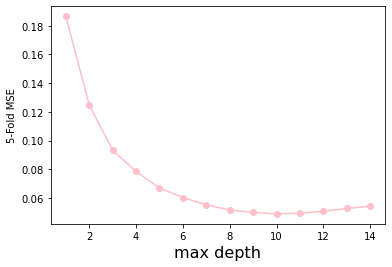

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeRegressor(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth, -scores, '-o', color='pink')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [37]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train, y_train)

y_pred_train = treeModel.predict(X_train)
y_pred_test = treeModel.predict(X_test)

print("El porcentaje de variabilidad explicada es: %.2f" % treeModel.score(X_test, y_test))
print("El MSE es: %.2f €" % mean_squared_error(y_test, y_pred_test))
print("El MAE es: %.2f €" % mean_absolute_error(y_test, y_pred_test))
print("El MAD es: %.2f €" % median_absolute_error(y_test, y_pred_test))
print("El RMSE es: %.2f €" % mean_squared_error(y_test, y_pred_test, squared=False))

El porcentaje de variabilidad explicada es: 0.83
El MSE es: 0.05 €
El MAE es: 0.16 €
El MAD es: 0.12 €
El RMSE es: 0.22 €


# 6. Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_3 = rf.predict(X_test)

In [39]:
print("El porcentaje de variabilidad explicada es: %.2f" % rf.score(X_test, y_test))
print("El MSE es: %.2f €" % mean_squared_error(y_test, y_pred_3))
print("El MAE es: %.2f €" % mean_absolute_error(y_test, y_pred_3))
print("El MAD es: %.2f €" % median_absolute_error(y_test, y_pred_3))
print("El RMSE es: %.2f €" % mean_squared_error(y_test, y_pred_3, squared=False))

El porcentaje de variabilidad explicada es: 0.88
El MSE es: 0.03 €
El MAE es: 0.14 €
El MAD es: 0.10 €
El RMSE es: 0.19 €


# 7. Gradient Boost

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_4 = gb.predict(X_test)

In [41]:
print("El porcentaje de variabilidad explicada es: %.2f" % gb.score(X_test, y_test))
print("El MSE es: %.2f €" % mean_squared_error(y_test, y_pred_4))
print("El MAE es: %.2f €" % mean_absolute_error(y_test, y_pred_4))
print("El MAD es: %.2f €" % median_absolute_error(y_test, y_pred_4))
print("El RMSE es: %.2f €" % mean_squared_error(y_test, y_pred_4, squared=False))

El porcentaje de variabilidad explicada es: 0.88
El MSE es: 0.03 €
El MAE es: 0.14 €
El MAD es: 0.10 €
El RMSE es: 0.19 €


# 8. XGBoost

In [42]:
!pip install xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)
y_pred_5 = xgb.predict(X_test)

In [43]:
print("El porcentaje de variabilidad explicada es: %.2f" % xgb.score(X_test, y_test))
print("El MSE es: %.2f €" % mean_squared_error(y_test, y_pred_5))
print("El MAE es: %.2f €" % mean_absolute_error(y_test, y_pred_5))
print("El MAD es: %.2f €" % median_absolute_error(y_test, y_pred_5))
print("El RMSE es: %.2f €" % mean_squared_error(y_test, y_pred_5, squared=False))

El porcentaje de variabilidad explicada es: 0.88
El MSE es: 0.03 €
El MAE es: 0.13 €
El MAD es: 0.10 €
El RMSE es: 0.19 €


# 9. Bagging

In [44]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10)
bag.fit(X_train, y_train)
y_pred_6 = bag.predict(X_test)

In [45]:
print("El porcentaje de variabilidad explicada es: %.2f" % bag.score(X_test, y_test))
print("El MSE es: %.2f €" % mean_squared_error(y_test, y_pred_6))
print("El MAE es: %.2f €" % mean_absolute_error(y_test, y_pred_6))
print("El MAD es: %.2f €" % median_absolute_error(y_test, y_pred_6))
print("El RMSE es: %.2f €" % mean_squared_error(y_test, y_pred_6, squared=False))


El porcentaje de variabilidad explicada es: 0.88
El MSE es: 0.03 €
El MAE es: 0.13 €
El MAD es: 0.10 €
El RMSE es: 0.19 €


# 10. KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_7 = knn.predict(X_test)

In [47]:
print("El porcentaje de variabilidad explicada es: %.2f" % knn.score(X_test, y_test))
print("El MSE es: %.2f €" % mean_squared_error(y_test, y_pred_7))
print("El MAE es: %.2f €" % mean_absolute_error(y_test, y_pred_7))
print("El MAD es: %.2f €" % median_absolute_error(y_test, y_pred_7))
print("El RMSE es: %.2f €" % mean_squared_error(y_test, y_pred_7, squared=False))

El porcentaje de variabilidad explicada es: 0.62
El MSE es: 0.11 €
El MAE es: 0.24 €
El MAD es: 0.18 €
El RMSE es: 0.33 €


# 11. COMPARACIONES

A continuación ordeno todos los métodos de **mejor a peor** según las métricas que he utilizado.

## 11.1 COMPARACIÓN BASADA EN LA VARIABILIDAD EXPLICADA

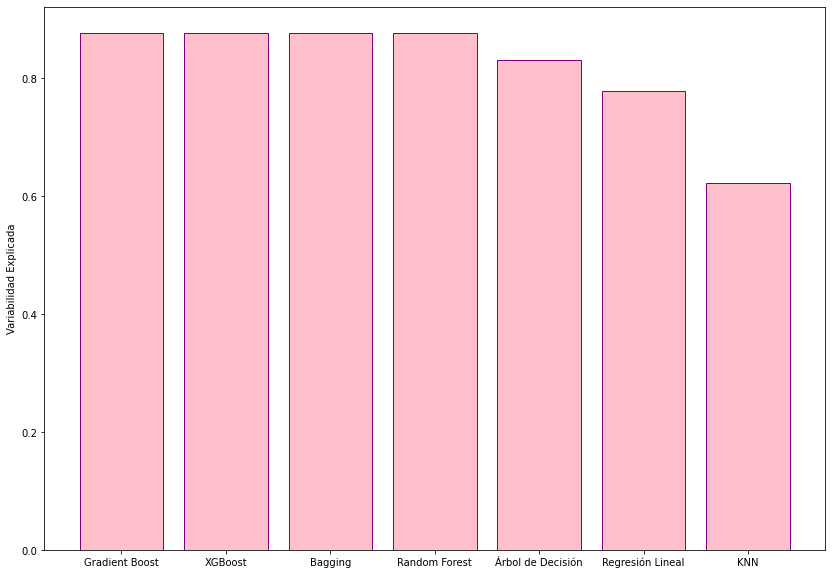

In [48]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

V_values = []
V_values.append(mod.score(X_test, y_test))
V_values.append(treeModel.score(X_test, y_test))
V_values.append(rf.score(X_test, y_test))
V_values.append(gb.score(X_test, y_test))
V_values.append(xgb.score(X_test, y_test))
V_values.append(bag.score(X_test, y_test))
V_values.append(knn.score(X_test, y_test))

model_names = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest','Gradient Boost','XGBoost','Bagging','KNN']

sorted_idx = np.argsort(V_values)[::-1]
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_V_values = [V_values[i] for i in sorted_idx]

plt.figure(figsize=(14,10))
plt.bar(sorted_model_names, sorted_V_values, color='pink', edgecolor='purple')
plt.ylabel('Variabilidad Explicada')
plt.show()

## 11.2 COMPARACIÓN BASADA EN MSE

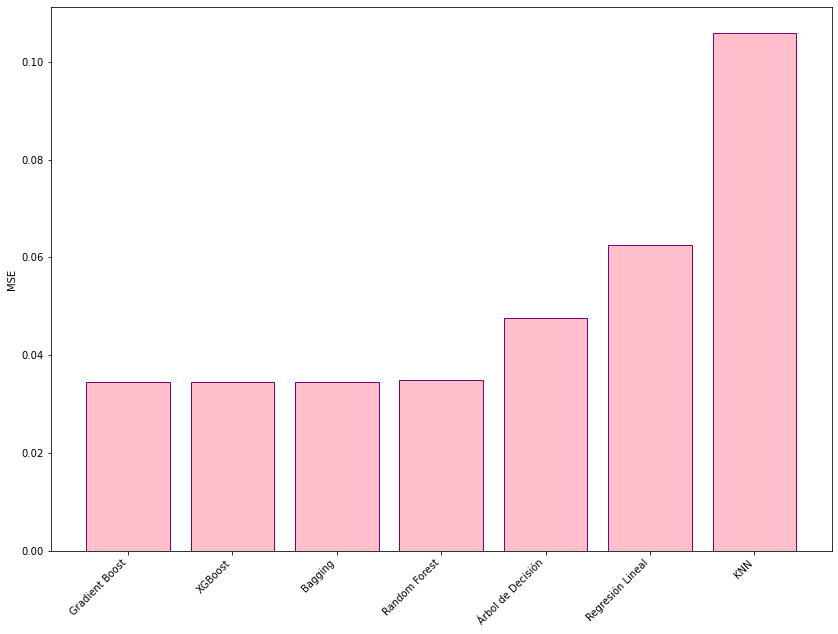

In [49]:
mse_values = []
mse_values.append(mean_squared_error(y_test, y_pred1))
mse_values.append(mean_squared_error(y_test, y_pred_test))
mse_values.append(mean_squared_error(y_test, y_pred_3))
mse_values.append(mean_squared_error(y_test, y_pred_4))
mse_values.append(mean_squared_error(y_test, y_pred_5))
mse_values.append(mean_squared_error(y_test, y_pred_6))
mse_values.append(mean_squared_error(y_test, y_pred_7))

model_names = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest','Gradient Boost','XGBoost','Bagging','KNN']

sorted_idx = np.argsort(mse_values)
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_mse_values = [mse_values[i] for i in sorted_idx]

plt.figure(figsize=(14,10))
plt.bar(sorted_model_names, sorted_mse_values, color='pink', edgecolor='purple')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.show()


## 11.3 COMPARACIÓN BASADA EN EL MAD

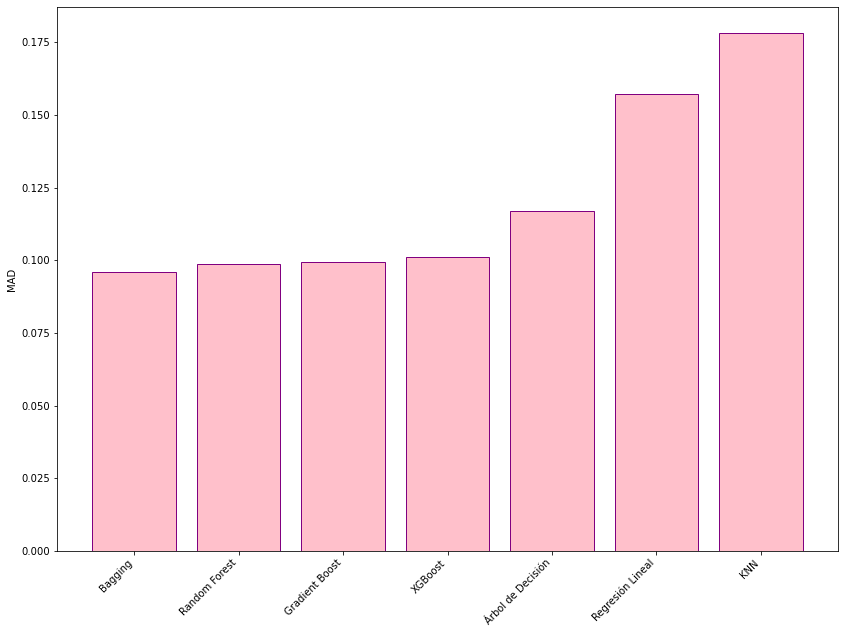

In [50]:
mad_values = []
mad_values.append(median_absolute_error(y_test, y_pred1))
mad_values.append(median_absolute_error(y_test, y_pred_test))
mad_values.append(median_absolute_error(y_test, y_pred_3))
mad_values.append(median_absolute_error(y_test, y_pred_4))
mad_values.append(median_absolute_error(y_test, y_pred_5))
mad_values.append(median_absolute_error(y_test, y_pred_6))
mad_values.append(median_absolute_error(y_test, y_pred_7))

model_names = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest','Gradient Boost','XGBoost','Bagging','KNN']

sorted_idx = np.argsort(mad_values)
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_mad_values = [mad_values[i] for i in sorted_idx]

plt.figure(figsize=(14,10))
plt.bar(sorted_model_names, sorted_mad_values, color='pink', edgecolor='purple')
plt.ylabel('MAD')
plt.xticks(rotation=45, ha='right')
plt.show()


## 11.4 COMPARACIÓN BASADA EN EL MAE

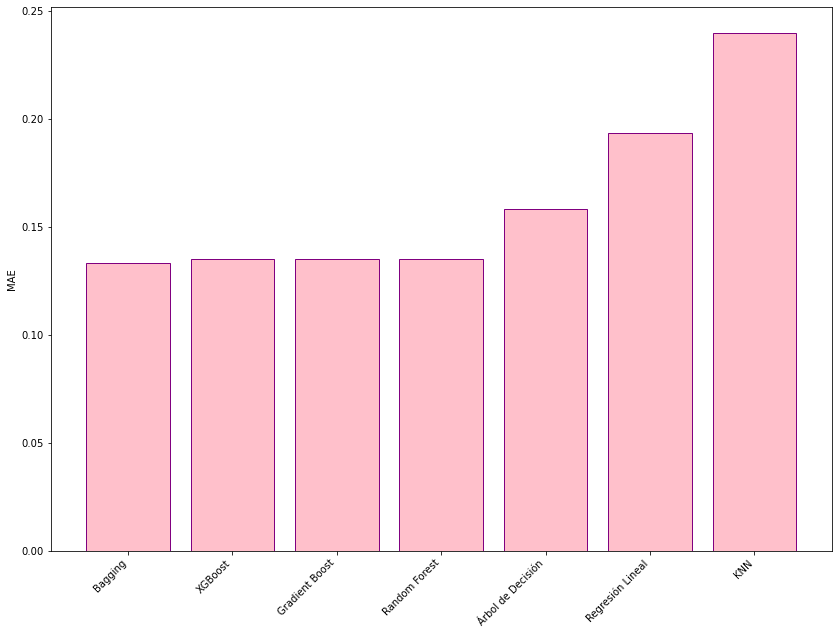

In [51]:
mae_values = []
mae_values.append(mean_absolute_error(y_test, y_pred1))
mae_values.append(mean_absolute_error(y_test, y_pred_test))
mae_values.append(mean_absolute_error(y_test, y_pred_3))
mae_values.append(mean_absolute_error(y_test, y_pred_4))
mae_values.append(mean_absolute_error(y_test, y_pred_5))
mae_values.append(mean_absolute_error(y_test, y_pred_6))
mae_values.append(mean_absolute_error(y_test, y_pred_7))

sorted_idx = np.argsort(mae_values)
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_mae_values = [mae_values[i] for i in sorted_idx]

plt.figure(figsize=(14,10))
plt.bar(sorted_model_names, sorted_mae_values, color='pink', edgecolor='purple')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.show()

## 11.5 COMPARACIÓN BASADA EN RMSE

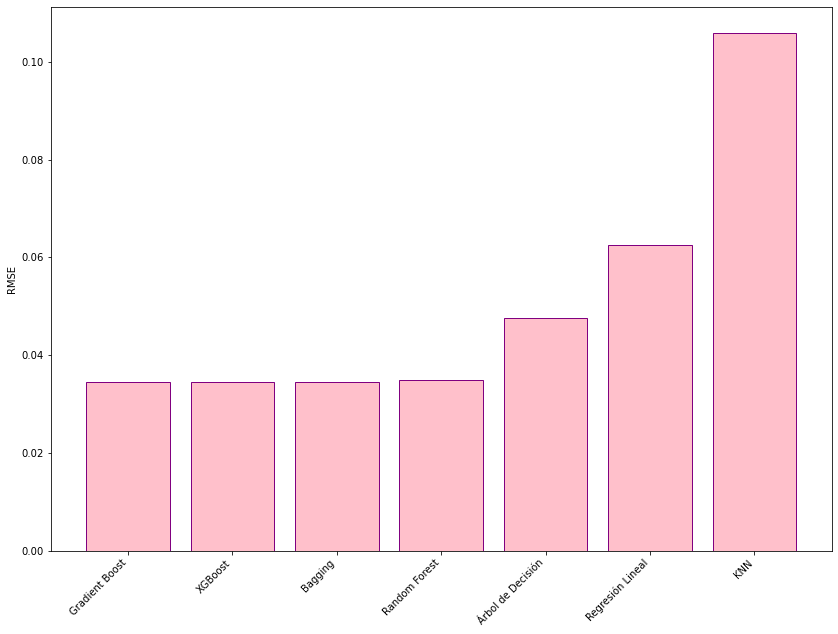

In [52]:
rmse_values = []
rmse_values.append(mean_squared_error(y_test, y_pred1))
rmse_values.append(mean_squared_error(y_test, y_pred_test))
rmse_values.append(mean_squared_error(y_test, y_pred_3))
rmse_values.append(mean_squared_error(y_test, y_pred_4))
rmse_values.append(mean_squared_error(y_test, y_pred_5))
rmse_values.append(mean_squared_error(y_test, y_pred_6))
rmse_values.append(mean_squared_error(y_test, y_pred_7))

sorted_idx = np.argsort(rmse_values)
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_rmse_values = [rmse_values[i] for i in sorted_idx]

plt.figure(figsize=(14,10))
plt.bar(sorted_model_names, sorted_rmse_values, color='pink', edgecolor='purple')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.show()

Respecto a cuál de todas las métricas creo que es la más conveniente, he decidido quedarme con el **MSE**. Dudé con el MAE pero para este problema en específico de estimación de precios de una vivienda, el MAE penaliza por igual los errores grandes que los pequeños, y hablando de cantidades grandes de dinero, sería un gran problema, por lo que elijo el MSE que da mayor peso a los errores grandes, siendo así el modelo con menor MSE el de **Gradient Boost** y además, el que mayor capacidad explicativa tiene.